# Figure 12

In [1]:
import numpy as np
import xarray as xr
from glob import glob

# cosima
import cosima_cookbook as cc

# plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import cmocean.cm as cmo

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33687/status,
Dashboard: /proxy/33687/status,Workers: 7
Total threads: 28,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36969,Workers: 7
Dashboard: /proxy/33687/status,Total threads: 28
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:37821,Total threads: 4
Dashboard: /proxy/37033/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:42179,


### Read in shelf temperature data and calculate anomaly

Read in timeseries which contains volume-averaged temperature over the continental shelf for the whole length of the simulations. 

In [3]:
start_time = '2150-01-01'
end_time = '2164-12-31'
datadir = '/g/data/e14/hd4873/access-om2-01/project03_misc_data/shelf_timeseries/'

cntl = xr.open_dataset(datadir + f'whole_shelf_control_{start_time}-{end_time}.nc')
ssp245 = xr.open_dataset(datadir + f'whole_shelf_ssp245_{start_time}-{end_time}.nc')
ssp245mw = xr.open_dataset(datadir + f'whole_shelf_ssp245mw_{start_time}-{end_time}.nc')
ssp585 = xr.open_dataset(datadir + f'whole_shelf_ssp585_{start_time}-{end_time}.nc')
ssp585mw = xr.open_dataset(datadir + f'whole_shelf_ssp585mw_{start_time}-{end_time}.nc')

Calculate time-averaged temperature anomalies across the last 5 years of the experiments. 

In [4]:
ti = '2160-01-01'
tf = '2164-12-31'

temp_anom = np.zeros(4)
temp_anom[0] = (ssp245.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.mean()
temp_anom[1] = (ssp245mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.mean()
temp_anom[2] = (ssp585.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.mean()
temp_anom[3] = (ssp585mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.mean()

temp_anom_std = np.zeros(4)
temp_anom_std[0] = (ssp245.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.std()
temp_anom_std[1] = (ssp245mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.std()
temp_anom_std[2] = (ssp585.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.std()
temp_anom_std[3] = (ssp585mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).temp.std()

print(np.round(temp_anom[0], decimals=2), np.round(temp_anom[1], decimals=2),
      np.round(temp_anom[2], decimals=2), np.round(temp_anom[3], decimals=2), )

0.1 0.11 0.2 0.52


### Read in shelf salinity and calculate anomaly

Read in timeseries which contains volume-averaged salinity over the continental shelf for the whole length of the simulations. 

In [5]:
start_time = '2150-01-01'
end_time = '2164-12-31'
datadir = '/g/data/e14/hd4873/access-om2-01/project03_misc_data/shelf_timeseries/'

cntl = xr.open_dataset(datadir + f'whole_shelf_control_{start_time}-{end_time}.nc')
ssp245 = xr.open_dataset(datadir + f'whole_shelf_ssp245_{start_time}-{end_time}.nc')
ssp245mw = xr.open_dataset(datadir + f'whole_shelf_ssp245mw_{start_time}-{end_time}.nc')
ssp585 = xr.open_dataset(datadir + f'whole_shelf_ssp585_{start_time}-{end_time}.nc')
ssp585mw = xr.open_dataset(datadir + f'whole_shelf_ssp585mw_{start_time}-{end_time}.nc')

Calculate time-averaged salinity anomalies across the last 5 years of the experiments. 

In [6]:
ti = '2160-01-01'
tf = '2164-12-31'

salt_anom = np.zeros(4)
salt_anom[0] = (ssp245.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.mean()
salt_anom[1] = (ssp245mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.mean()
salt_anom[2] = (ssp585.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.mean()
salt_anom[3] = (ssp585mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.mean()

salt_anom_std = np.zeros(4)
salt_anom_std[0] = (ssp245.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.std()
salt_anom_std[1] = (ssp245mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.std()
salt_anom_std[2] = (ssp585.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.std()
salt_anom_std[3] = (ssp585mw.sel(time=slice(ti,tf)) - cntl.sel(time=slice(ti,tf))).salt.std()

print(np.round(salt_anom[0], decimals=2), np.round(salt_anom[1], decimals=2),
      np.round(salt_anom[2], decimals=2), np.round(salt_anom[3], decimals=2), )

-0.04 -0.17 -0.1 -0.68


### Plot figure

In [7]:
x_Sv = np.array([0.08746, 0.042*1.3+0.08746, 0.16*1.3+0.08746])
x = (x_Sv/0.08746)*100
x = np.round(x)
print(x)

[100. 162. 338.]


In [8]:
T_mw = [0, temp_anom[1]-temp_anom[0], temp_anom[-1]-temp_anom[-2]]
S_mw = [0, salt_anom[1]-salt_anom[0], salt_anom[-1]-salt_anom[-2]]

In [9]:
def figure_setup():

    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(ncols=1, figsize=(8,5))
    lw = 2
    c1, c2 = 'indianred', 'steelblue'

    axes.plot([50, 400],[0, 0], c='gainsboro')
    axes.plot([100, 100],[-0.1, 0.5], c='gainsboro', ls='--')
    axes.plot([162.4, 162.4], [-0.7, 0.5], c='gainsboro', ls='--')
    axes.plot([338, 338], [-0.7, 0.5], c='gainsboro', ls='--')

    axes.set_ylim([-0.02, 0.35])
    axes.set_xlim([90, 350])

    axes.tick_params(axis='y', colors=c1)
    axes.yaxis.label.set_color(c1)  
    axes.set_ylabel('Temperature anomaly (\u00b0C)')
    axes.set_xlabel('Meltwater forcing relative to CONTROL', labelpad=40)
    axes.set_xticklabels(['',1,'1.5x','2x','2.5x','3x','3.5x'], zorder=5)

    ax2 = axes.twinx()
    ax2.plot([50, 400],[0, 0], c='gainsboro')
    ax2.set_ylim([-0.6,0.03])
    ax2.spines['left'].set_color(c1)
    ax2.spines['right'].set_color(c2)
    ax2.tick_params(axis='y', colors=c2)
    ax2.yaxis.label.set_color(c2)  
    ax2.set_ylabel('Salinity anomaly (g/kg)')

    axes.annotate('CONTROL \nmeltwater\n (0.0875 Sv)', xy=(100, -0.019), xytext=(120, -0.09),
              arrowprops=dict(facecolor='lightgrey', edgecolor='grey', lw=2, arrowstyle='->'), 
              ha='center', color='grey', fontsize=10,
              clip_on=False, zorder=0)
    axes.annotate('lower \nmeltwater\n(0.142 Sv)', xy=(162, -0.016), xytext=(162, -0.09),
                  arrowprops=dict(facecolor='grey', edgecolor='grey', lw=2, arrowstyle='->'), 
                  ha='center', color='grey', fontsize=10,
                  clip_on=False, zorder=0)
    axes.annotate('high \nmeltwater\n(0.295 Sv)', xy=(338, -0.016), xytext=(338, -0.09),
                  arrowprops=dict(facecolor='grey', edgecolor='grey', lw=2, arrowstyle='->'), 
                  ha='center', color='grey', fontsize=10,
                  clip_on=False, zorder=0)

    axes = [axes, ax2]

    return fig, axes, c1, c2, lw

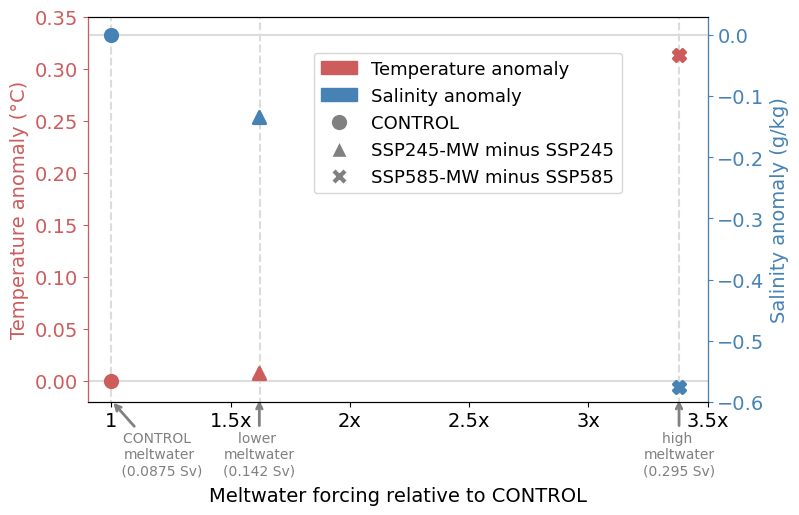

In [10]:
fig, axes, c1, c2, lw = figure_setup()

axes[0].scatter(x[0], T_mw[0], lw=lw, marker='o', s=80, c=c1, zorder=5)
axes[0].scatter(x[1], T_mw[1], lw=lw, marker='^', s=80, c=c1, zorder=5)
axes[0].scatter(x[2], T_mw[2], lw=lw, marker='X', s=80, c=c1, zorder=5)

axes[1].scatter(x[0], S_mw[0], lw=lw, marker='o', s=80, c=c2, zorder=5)
axes[1].scatter(x[1], S_mw[1], lw=lw, marker='^', s=80, c=c2, zorder=5)
axes[1].scatter(x[2], S_mw[2], lw=lw, marker='X', s=80, c=c2, zorder=5)

# add legend
legend_labels = ['Temperature anomaly', 'Salinity anomaly','CONTROL','SSP245-MW minus SSP245','SSP585-MW minus SSP585']
temp_patch = mpatches.Patch(color=c1)
salt_patch = mpatches.Patch(color=c2)
line1 = Line2D([0], [0], color='w', markerfacecolor=c1,  marker='o', markersize=10)
line2 = Line2D([0], [0], color='w', markerfacecolor=c2, linestyle=None, marker='d', markersize=10, linewidth=2)
line3 = Line2D([0], [0], color='w', markerfacecolor='grey', linestyle=None, marker='o', markersize=12, )
line4 = Line2D([0], [0], color='w', markerfacecolor='grey', linestyle=None, marker='^', markersize=12, )
line5 = Line2D([0], [0], color='w', markerfacecolor='grey', linestyle=None, marker='X', markersize=12, )
axes[1].legend([temp_patch, salt_patch, line3, line4, line5],legend_labels, 
            bbox_to_anchor=[0.35, 0.93], loc='upper left', fontsize=13, ncols=1, columnspacing=1)

# save figure
fig.savefig('/home/561/hd4873/project3/figs/Fig12.jpg', dpi=300, bbox_inches='tight')

plt.show()